In [22]:

from Functions import *
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Load the digits dataset
digits = load_digits()

# Access the data
X = digits.data  # Feature matrix
y = digits.target  # Labels

ixs = np.where(y>6)
X = X[ixs]
y = y[ixs]

np.random.seed(42)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=2)
X_tsne = tsne.fit_transform(X)

pca = PCA(whiten=True)
X_whitened = pca.fit_transform(X)
X_whitened_tsne = tsne.fit_transform(X_whitened)




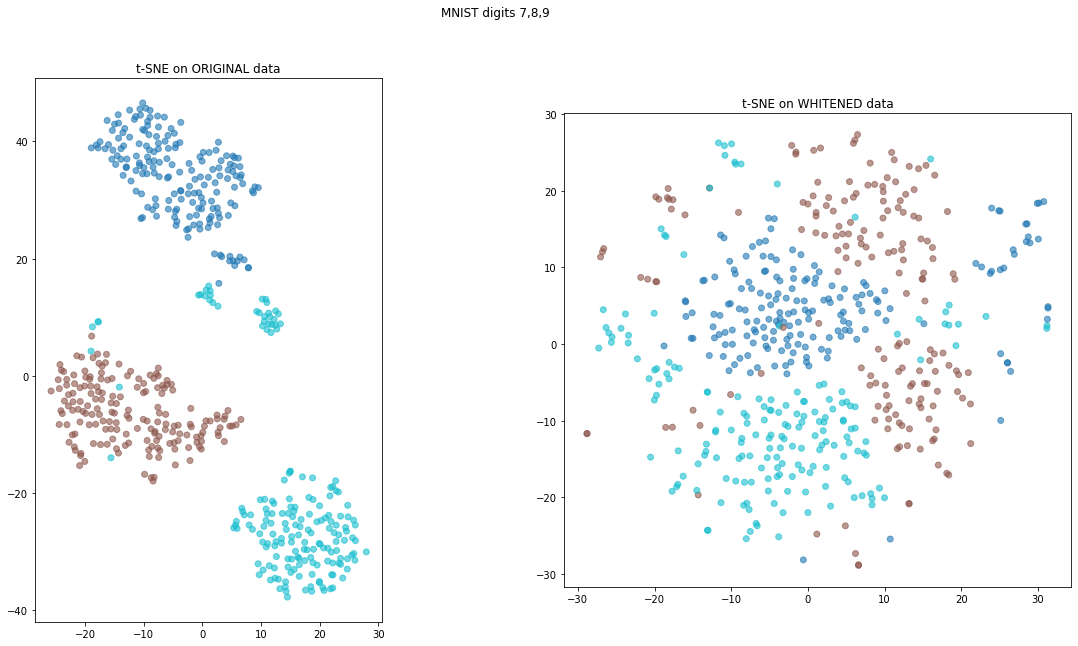

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

fig.suptitle('MNIST digits 7,8,9')

# Plot the results
axs[0].set_title('t-SNE on ORIGINAL data')
axs[0].set_aspect('equal', adjustable='box')
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.6, cmap='tab10')

# Plot the results
axs[1].set_title('t-SNE on WHITENED data')
axs[1].set_aspect('equal', adjustable='box')
axs[1].scatter(X_whitened_tsne[:, 0], X_whitened_tsne[:, 1], c=y, alpha=0.6,cmap='tab10')
plt.savefig('visuals/whitened789')

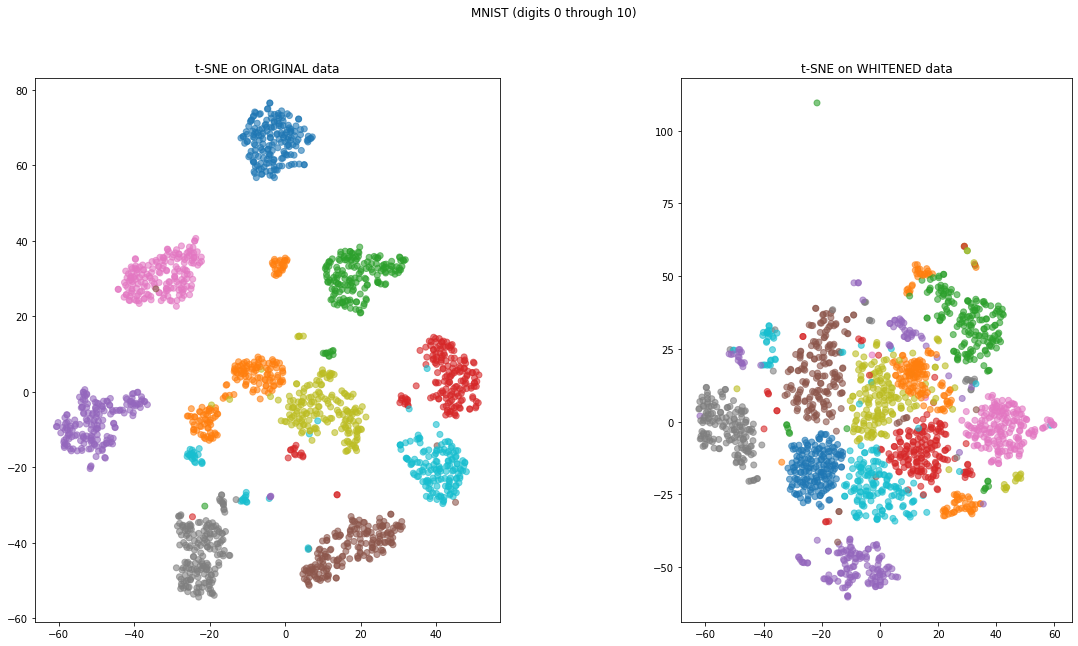

In [24]:

from Functions import *
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Load the digits dataset
digits = load_digits()

# Access the data
X = digits.data  # Feature matrix
y = digits.target  # Labels

np.random.seed(42)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=2)
X_tsne = tsne.fit_transform(X)

pca = PCA(whiten=True)
X_whitened = pca.fit_transform(X)
X_whitened_tsne = tsne.fit_transform(X_whitened)

fig, axs = plt.subplots(1, 2, figsize=(20,10))

fig.suptitle('MNIST (digits 0 through 10)')

# Plot the results
axs[0].set_title('t-SNE on ORIGINAL data')
axs[0].set_aspect('equal', adjustable='box')
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.6, cmap='tab10')

# Plot the results
axs[1].set_title('t-SNE on WHITENED data')
axs[1].set_aspect('equal', adjustable='box')
axs[1].scatter(X_whitened_tsne[:, 0], X_whitened_tsne[:, 1], c=y, alpha=0.6,cmap='tab10')

plt.savefig('visuals/whitened_alldigits')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_whitened, y, test_size=0.2, random_state=20)


# KNN ON NON WHITENED
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# KNN ON WHITENED
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_w, y_train_w)
y_pred_w = knn.predict(X_test_w)
accuracy_w = accuracy_score(y_test_w, y_pred_w)

print('accuracy of NON-whitened:', accuracy)
print('accuracy of WHITENED:', accuracy_w)

accuracy of NON-whitened: 0.9861111111111112
accuracy of WHITENED: 0.925


/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n